# PARKINSONS CLASSIFICATION MODEL

Predicting Parkinsons disease using patient health metrics, enabling early detection and prevention.

## Data Collection and Loading

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
df = pd.read_csv("../datasets/parkinsons.csv")

### Preview of data

In [3]:
#displaying the first 5 rows of the dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#extracting the shape of the dataset
df.shape

(195, 24)

In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Exploratory Data Analysis

In [6]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Overview and Statistics

In [7]:
#extracting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
#finding missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
#finding duplicated rows in the dataset
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 0


In [10]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

0 -> negative case\
1 -> positive case

In [12]:
#removing non-numeric columns
df.drop('name', axis=1, inplace=True)

In [13]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


### Data Visualization

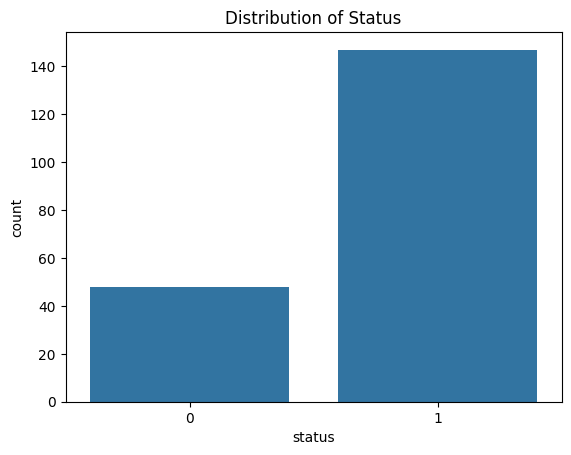

In [14]:
# Plot distribution of target variable
sns.countplot(x='status', data=df)
plt.title('Distribution of Status')
plt.show()


The dataset is **imbalanced**, with significantly more patients having parkinson's disease.

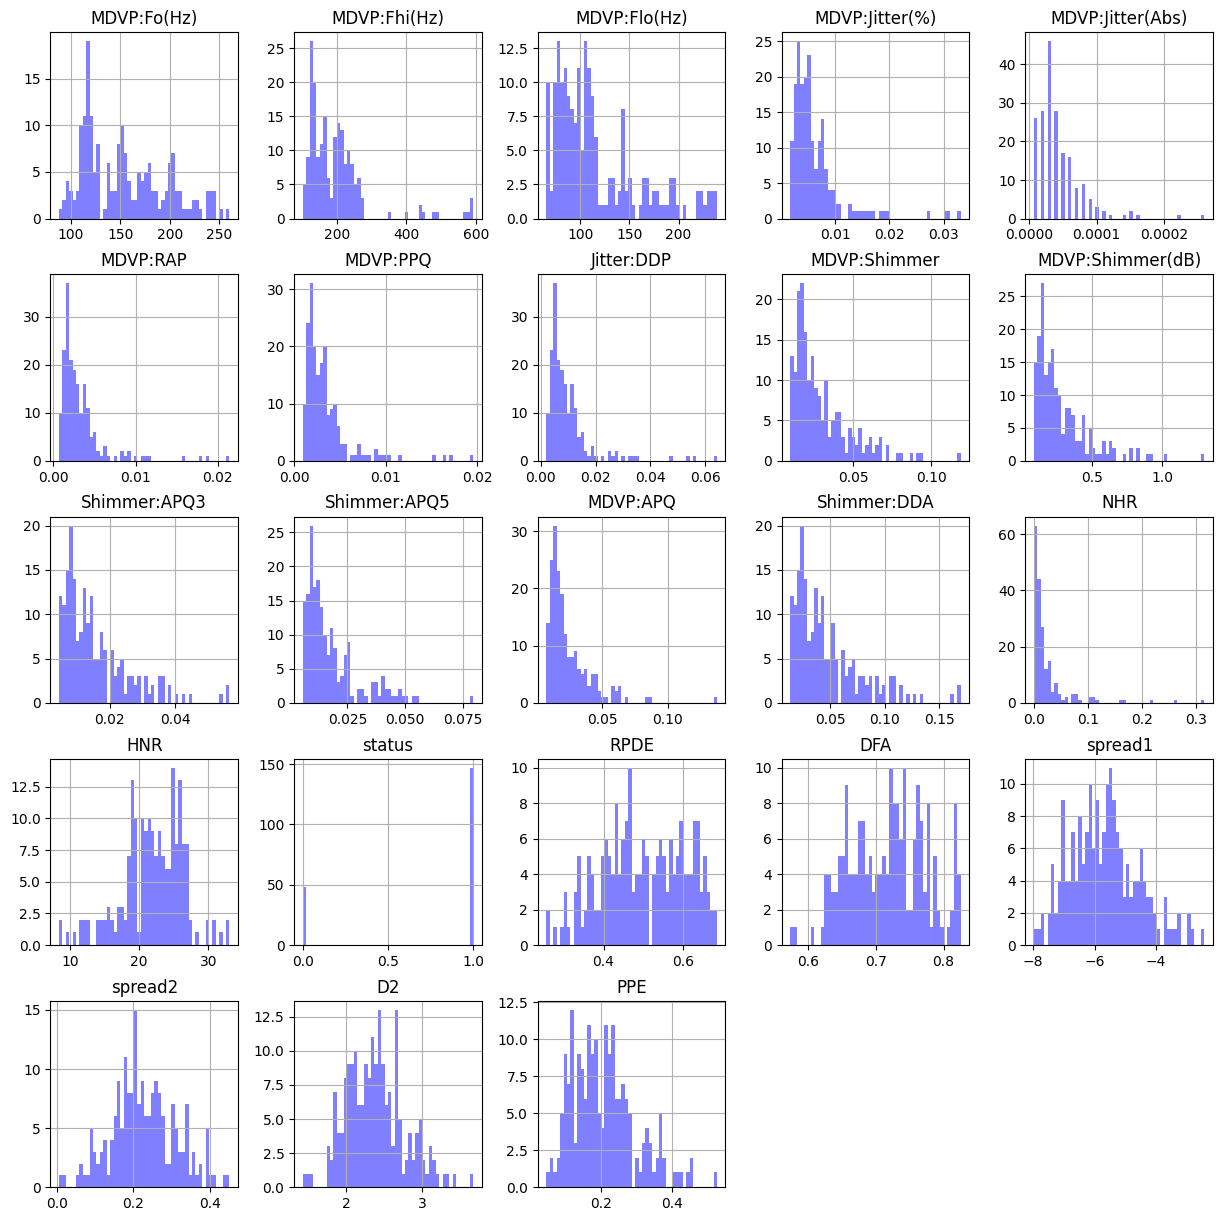

In [15]:
df.hist(bins = 50, figsize = (15, 15), color = 'b', grid=True, alpha=0.5)
plt.show()

- Several features appear skewed and require transformation or scaling.
- There is a possibility of outliers.
- Confirms class imbalance

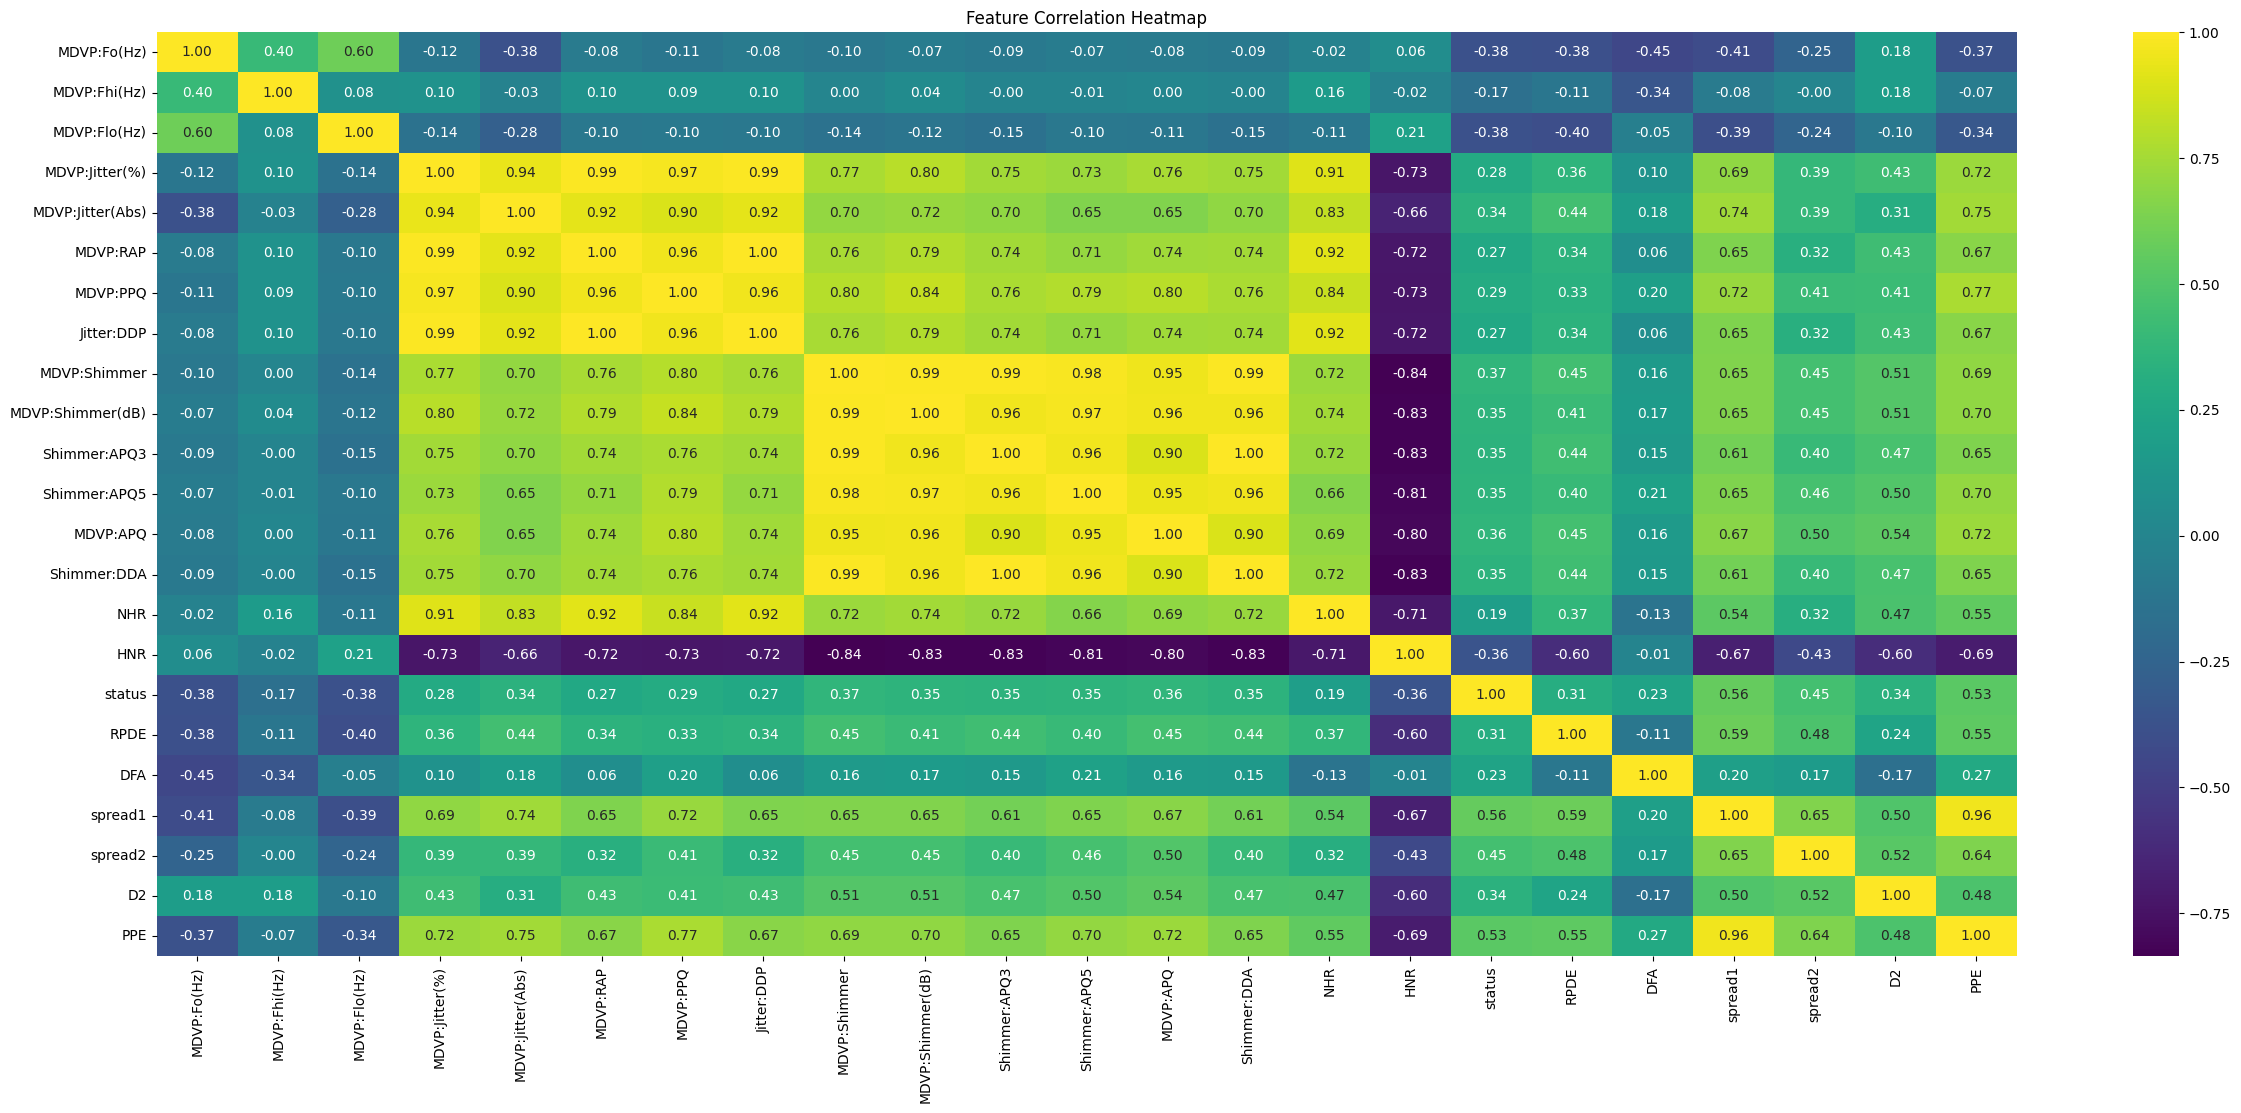

In [16]:
plt.figure(figsize=(30, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

- Certain features show moderate positive/negative correlations.
- No extreme correlations (near 1.0 or -1.0) are observed, but clusters of related features emerge.

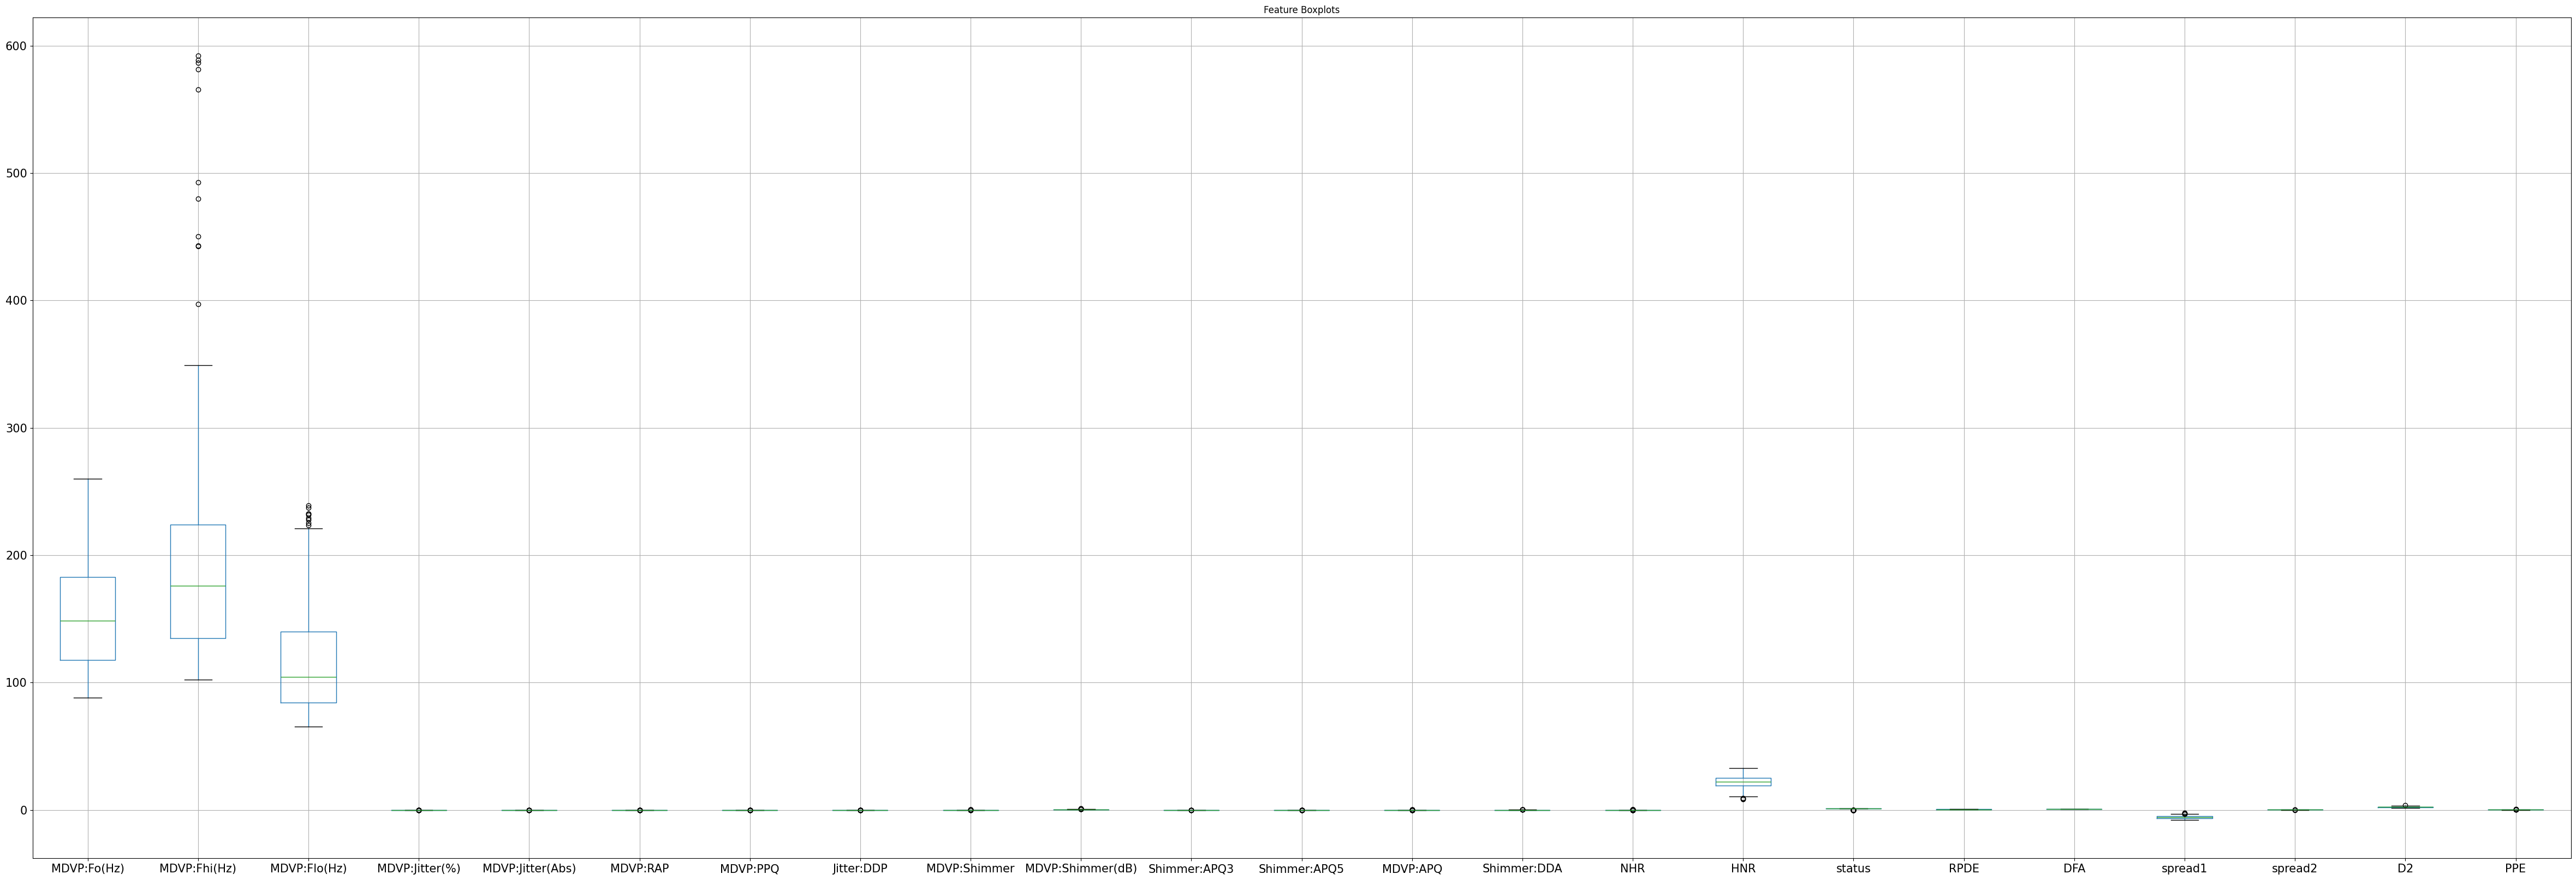

In [17]:
#Boxplotss for all numerical features
df.boxplot(grid=True, fontsize=15, figsize=(60,20))
plt.title("Feature Boxplots")
plt.show()

- Several outliers visible for first few columns

In [18]:
X = df.drop('status', axis=1)
y = df['status']

In [19]:
#identifying outliers

cols_with_outliers = []

for col in X.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    num_outliers = outliers_mask.sum()
    
    if num_outliers > 0:
        cols_with_outliers.append(col)
        print(f"{col} has {num_outliers} outliers.")


MDVP:Fhi(Hz) has 11 outliers.
MDVP:Flo(Hz) has 9 outliers.
MDVP:Jitter(%) has 14 outliers.
MDVP:Jitter(Abs) has 7 outliers.
MDVP:RAP has 14 outliers.
MDVP:PPQ has 15 outliers.
Jitter:DDP has 14 outliers.
MDVP:Shimmer has 8 outliers.
MDVP:Shimmer(dB) has 10 outliers.
Shimmer:APQ3 has 6 outliers.
Shimmer:APQ5 has 13 outliers.
MDVP:APQ has 12 outliers.
Shimmer:DDA has 6 outliers.
NHR has 19 outliers.
HNR has 3 outliers.
spread1 has 4 outliers.
spread2 has 2 outliers.
D2 has 1 outliers.
PPE has 5 outliers.


## Data Cleaning and Preprocessing

In [20]:
#importing necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [21]:
print(X.isnull().sum())

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [22]:
for col in X.columns:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"{col} has {zero_count} zero values.")

No missing values found

In [23]:
#Handling outliers using IQR method

for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #defining acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Capping the values
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound

In [24]:
#SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [25]:
print("Original dataset shape: ", X.shape, y.shape)
print("Resampled dataset shape: ", X_res.shape, y_res.shape)

Original dataset shape:  (195, 22) (195,)
Resampled dataset shape:  (294, 22) (294,)


In [26]:
print("Initial Outcome: ",y.value_counts())
print("Revised Outcome: ",y_res.value_counts())

Initial Outcome:  status
1    147
0     48
Name: count, dtype: int64
Revised Outcome:  status
1    147
0    147
Name: count, dtype: int64


In [27]:
#Feature Scaling
scaler = StandardScaler()

In [28]:
X_scaled = scaler.fit_transform(X_res)

## Data Splitting

In [29]:
#imporing necessary libraries
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_res, 
    test_size=0.2, 
    random_state=42,
    stratify=y_res
    )

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 22), (59, 22), (235,), (59,))

## Model Building

In [32]:
#importing necessary libraries
from sklearn.svm import SVC

In [33]:
model = SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')

In [34]:
model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [35]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

## Model Evaluation

In [36]:
#import necessary libraries

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
print(accuracy_score(y_train, Y_train_pred))

0.9191489361702128


In [38]:
print(accuracy_score(y_test, Y_test_pred))

0.9152542372881356


In [39]:
print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.83      0.91        29

    accuracy                           0.92        59
   macro avg       0.93      0.91      0.91        59
weighted avg       0.93      0.92      0.91        59



<Axes: >

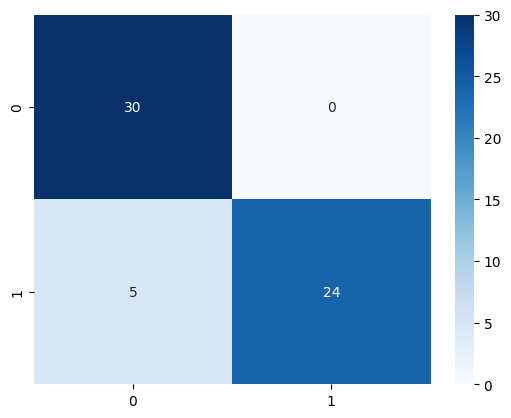

In [40]:
cm = confusion_matrix(y_test, Y_test_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')

## Model Saving

In [41]:
#importing necessary libraries
import pickle

In [42]:
filename = "parkinsons_model.sav"

In [43]:
#Save trained model
pickle.dump(model, open(filename, 'wb'))

In [44]:
#Save the Scaler
scaler_filename = "parkinsons_model_scaler.pkl"

In [45]:
pickle.dump(scaler, open(scaler_filename, 'wb'))